# Check the DMRG algorithm in the Critical point of the 2nn Case

We test the performance of DMRG in the critical point ($h_{max}=2e$) for different bond dimension and sweeps at a large size ($l=128,256$)

##### Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [34]:
bonddim=np.array([200])
sweeps=np.arange(1,20)
seed=[12,35,356,145,98,236,659]
init_bonddim=256
l=128
replica=1
h=2*np.exp(1)
eng=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed)))
v=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed),l))
z=np.zeros((bonddim.shape[0],sweeps.shape[0],len(seed),l))
for i,b in enumerate(bonddim):
    for j,s in enumerate(sweeps):
        for k,w in enumerate(seed):
        
            data=np.load(f'data/check_dmrg/test_unet_periodic_2nn_noiseless_{init_bonddim}_init_bonddim_{replica}_replica_{l}_l_{h}_h_1_n_{s}_sweep_{b}_bonddim_{w}_seed.npz')
            eng[i,j,k]=data['energy']
            v[i,j,k]=data['potential']
            z[i,j,k]=data['density']      



Results

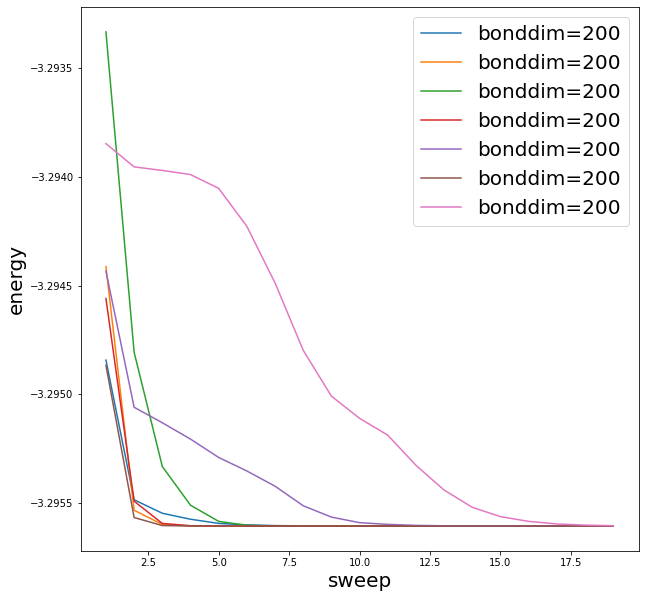

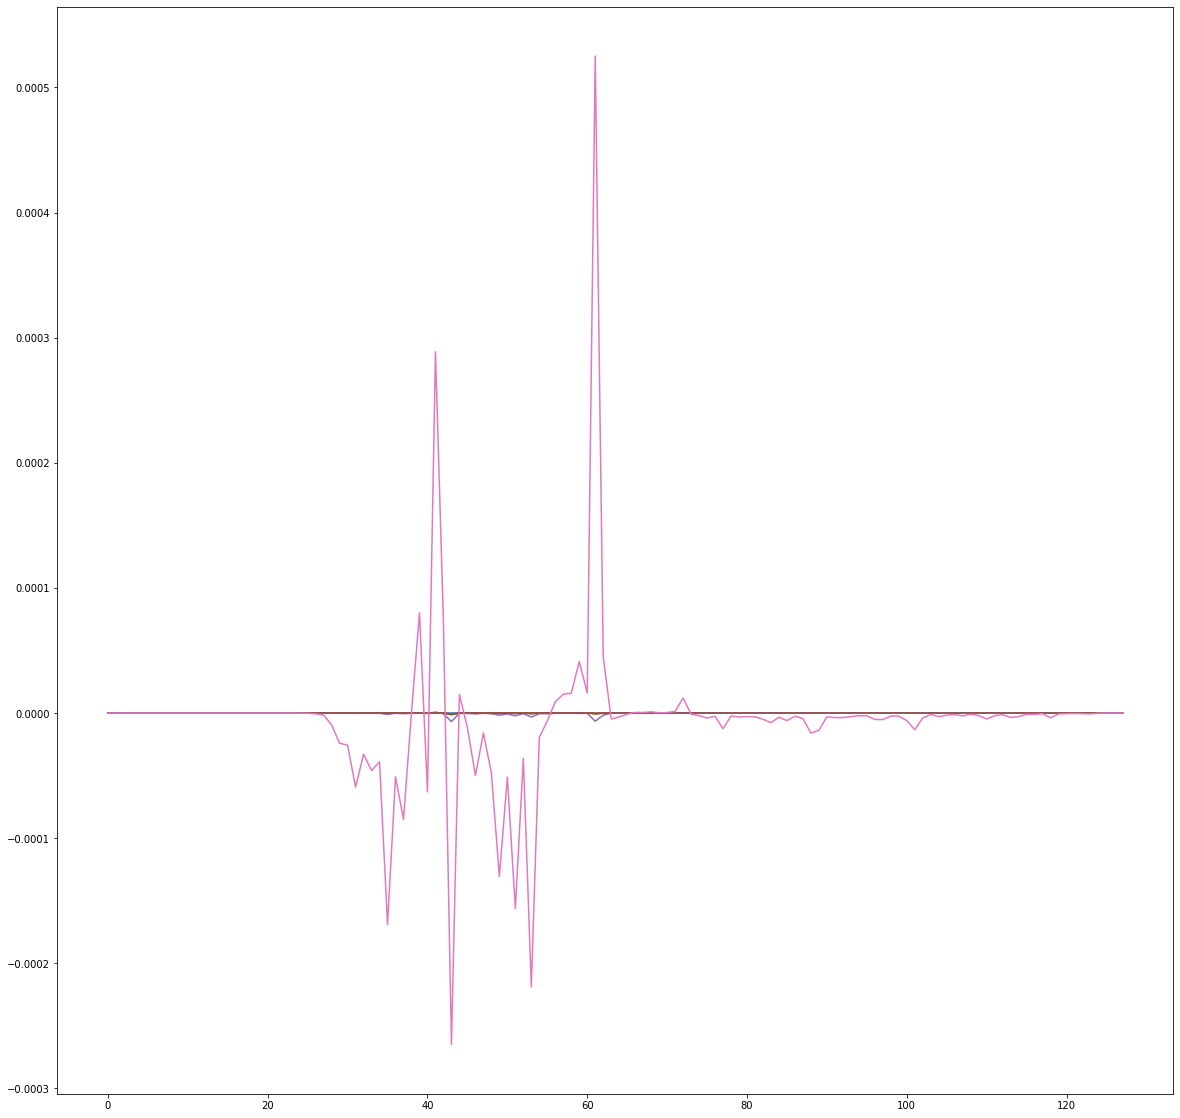

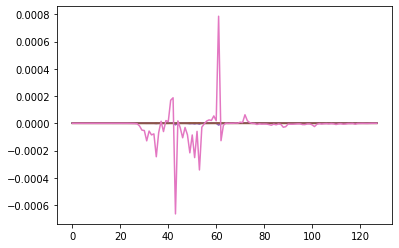

In [35]:
plt.figure(figsize=(10,10))
for i in range(0,bonddim.shape[0]):
    for k in range(len(seed)):
        plt.plot(sweeps,eng[i,:,k],label=f'bonddim={bonddim[i]}')
    plt.legend(fontsize=20)
    plt.xlabel('sweep',fontsize=20)
    plt.ylabel('energy',fontsize=20)
    plt.show()

plt.figure(figsize=(20,20))
for i in range(bonddim.shape[0]):
    for k in range(len(seed)):    
        plt.plot(z[i,-1,k]-z[i,-1,0])
    plt.show()
    
for i in range(bonddim.shape[0]):
    for k in range(len(seed)):    
        plt.plot(z[i,-2,k]-z[i,-2,0])
    plt.show()


